## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import shap
import pickle
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting a random seed for reproducibility
np.random.seed(1)

In [3]:
# number of records to be simulated
num_applicants = 250

## Creating fields/features

It is important to create useful features that a machine learning model will be able to learn from. To determine the success of students in the internship, a number of factors will prove very useful such as research experience, age, cgpa

#### Simulating Academic Performace(CGPA)

In [4]:
academic_performance = np.random.uniform(low=3.0, high=5.0, size=num_applicants)

In [5]:
academic_performance[:10]

array([3.83404401, 4.44064899, 3.00022875, 3.60466515, 3.29351178,
       3.18467719, 3.37252042, 3.69112145, 3.79353495, 4.07763347])

The simulation of academic performance simply randomly selects numbers between 3.0 to 5.0. Assuming that all students graduated within this range.

#### Simulating Research Experience

In [6]:
research_experience = np.random.choice([0, 1], size=num_applicants, p=[0.3, 0.7])

In [7]:
research_experience[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

If an intern has had a prior research experience, such candidate is likely to perform better than another intern who wasn't exposed to research  till the intership

#### Simulating Relevant Skills

In [8]:
relevant_skills = np.random.randint(low=3, high=9, size=num_applicants)

In [9]:
relevant_skills[:10]

array([3, 7, 4, 7, 3, 5, 8, 6, 5, 8])

Relevant skills identifies the unique number of skills that each intern has and how it will be useful as they intern

#### Simulating Letter of Recommendation

In [10]:
letters_of_recommendation = np.random.randint(low=1.0, high=4.0, size=num_applicants)

In [11]:
letters_of_recommendation[:10]

array([2, 1, 1, 3, 1, 2, 3, 1, 1, 2])

It is assumed that each intern should submit 1 or more recommendations, submitting more than one could assure the intern's success to carry on till the end of the program

#### Simulating motivation level

In [12]:
motivation_level = np.random.randint(low=1, high=10, size=num_applicants)

In [13]:
motivation_level[:10]

array([9, 6, 7, 1, 4, 4, 6, 2, 9, 6])

Usually, someone who has a motivation greater than average or 5 in this case is likely to stay committed till the end. One should expect much from someone with motivation greater than 8 because to whom much is given, much is expected.

#### Simulating Education Status

In [14]:
education_levels = np.random.choice([0, 1, 2], size=num_applicants, p=[0.5, 0.3, 0.2])

In [15]:
education_levels[:10]

array([1, 0, 0, 2, 0, 0, 2, 0, 2, 2])

The educational status is very important. Someone with a PhD experience is more likely to be very skilled at research than a fresh graduate with Bsc. 0, 1 and 2 mean BSc, MSc and Phd respectively in the data.

#### Simulating Age

In [16]:
age = np.random.randint(low=18, high=30, size=num_applicants)

In [17]:
age[:10]

array([25, 27, 22, 25, 25, 23, 24, 29, 28, 24])

Assuming all interns are within the ages of 18 and 30.

#### Simulating Interview Score during Oral Assessment

In [18]:
interview_score = np.random.randint(low=4, high=10, size=num_applicants)

In [19]:
interview_score[:10]

array([9, 5, 5, 6, 6, 9, 7, 4, 6, 6])

The interview score when the intern was interviewed is important, the score collated by the church helps to know what rating is likey to be given to an intern.

#### Simulating Coding Experience

In [20]:
coding_experience = np.random.randint(low=1, high=10, size=num_applicants)

In [21]:
coding_experience[:10]

array([5, 1, 4, 5, 1, 3, 5, 2, 7, 1])

A very good coding experience is needed for this internship and those who know how to code with little or no help can perform tasks on their own. This is a good feature to use to predict intern success

#### Simulating Current Work Status

In [22]:
work_status = np.random.choice([0, 1, 2], size=num_applicants, p=[0.4, 0.3, 0.3])

In [23]:
work_status[:10]

array([0, 1, 1, 2, 0, 0, 0, 2, 1, 2])

Assuming that most of the interns are employed while some are self employed and unemployed, this feature is going to help to ascertain the hours interns will be willing to committ with the busy schedule. 0, 1 and 2 mean Employed, Self-Employed and Unemployed respectively in the data.

#### Simulating hours of committment

In [24]:
hours_of_committment = np.random.choice([5,10,20,30,40], size=num_applicants, p=[0.1, 0.4, 0.2,0.2,0.1])

In [25]:
hours_of_committment[:10]

array([40, 10, 40, 40,  5, 20, 40, 30, 20, 10])

Let's assume that many interns are able to committ 10 hours weekly while others are able to give up to 40 hours and some as low as 5 hours because of a busy schedule.

#### Simulating Relationship Status

In [26]:
relationship_status = np.random.choice([0, 1], size=num_applicants, p=[0.8, 0.2])

In [27]:
relationship_status[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

Assuming many interns are singles, they are likely to committ more time to the program. 0 and 1 mean Single and Married respectively in the data.

#### Simulating Work Experience

In [28]:
experience = np.random.randint(low=0, high=10, size=num_applicants)

In [29]:
experience[:10]

array([0, 5, 0, 6, 9, 5, 2, 9, 1, 3])

This defines the work experience of interns, someone with a high number of Years of experience(YOE) is likely to know how to manage time and stress in order to meet up with deadlines

#### Simulating access to electricity

In [30]:
access_to_constant_electricity = np.random.choice([0, 1], size=num_applicants, p=[0.2, 0.8])

In [31]:
access_to_constant_electricity[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

Constant electricity is very essential to guaranty an intern's success to some extent. 0 and 1 mean No and Yes respectively in the data.

#### Simulating extracurricular activities

In [32]:
extracurricular_activities = np.random.choice([0, 1], size=num_applicants, p=[0.7, 0.3])

In [33]:
extracurricular_activities[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

All work and no play can make a Jack-like intern dull, therefore it is important to take timeout from work sometimes. Hence, involvement in extracurricular could boost an intern's communication skills, presentation skill and managerial skill. 0 and 1 mean No and Yes respectively in the data.

#### Simulating Internship Success

In [34]:
internship_success = np.random.choice([0, 1], size=num_applicants, p=[0.3, 0.7])

This is a binary target for the machine learning model where 0 is not-successful and 1 means successful internship

#### Creating DataFrame from the simulated data

In [35]:

data = pd.DataFrame({
    'Academic_Performance': academic_performance,
    'Research Experience' : research_experience,
    'Relevant_Skills': relevant_skills,
    'Letters_of_Recommendation': letters_of_recommendation,
    'Interview_Score': interview_score,
    'Motivation Level' : motivation_level,
    'Extracurricular_Activities': extracurricular_activities,
    'Age' : age,
    'Coding Experience' : coding_experience,
    'Work Status' : work_status,
    'Access to Constant Electricity' : access_to_constant_electricity,
    'Internship_Success': internship_success
    
})

In [36]:
data.head()

,Academic_Performance,Research Experience,Relevant_Skills,Letters_of_Recommendation,Interview_Score,Motivation Level,Extracurricular_Activities,Age,Coding Experience,Work Status,Access to Constant Electricity,Internship_Success
0,3.834044,0,3,2,9,9,1,25,5,0,1,0
1,4.440649,1,7,1,5,6,0,27,1,1,0,1
2,3.000229,1,4,1,5,7,1,22,4,1,1,1
3,3.604665,1,7,3,6,1,0,25,5,2,0,1
4,3.293512,1,3,1,6,4,1,25,1,0,0,0


In [37]:
data.shape

(250, 12)

#### Data Splitting

Splitting the data into train and test set helps to validate the data. Validating the data on the test set and checking the metrics helps to avoid issues like overfitting and underfitting

In [38]:
X,y = data.drop('Internship_Success', axis = 1), data['Internship_Success']

In [39]:
X.columns.to_list()

['Academic_Performance',
 'Research Experience',
 'Relevant_Skills',
 'Letters_of_Recommendation',
 'Interview_Score',
 'Motivation Level',
 'Extracurricular_Activities',
 'Age',
 'Coding Experience',
 'Work Status',
 'Access to Constant Electricity']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state= 2023, stratify = y)

#### Modelling and Evaluation

This section shows the processes taken in modelling and evaluation. This is a classification problem and classifiers are used. Unlike a regression problem which involves continuous targets, classification problems contain distinct targets. For example, binary classification, multi-classification, multi-label classification

First approach was to use a basic classifier such as logistic regression, test on a holdout set

In [41]:
lr = LogisticRegression(random_state = 1)

In [42]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [43]:
lr_model_predictions = lr.predict(x_test)

##### Using a Classification Report to understand metrics

Classification report shows information about precision, recall and f1-score. For the logistic regression model trained, the classification report is shown below.

When tested on the test set, the model yields an accuracy of 57%, f1-score of about 0.23 and 0.7 for 0 and 1 respectively. 

In machine learing, the metric to use for classification algorithm is f1-score. The reason is because of its balance between precision and recall so there isn't bias.

In [44]:
print(classification_report(y_test,lr_model_predictions))

              precision    recall  f1-score   support

           0       0.31      0.18      0.23        22
           1       0.64      0.78      0.70        41

    accuracy                           0.57        63
   macro avg       0.47      0.48      0.47        63
weighted avg       0.52      0.57      0.54        63



The accuracy of the logistic regression model is about 57% which is more than average and could be considered a fairly accuratee model

Second approach for modelling is to use the catboost classifier which has always proved to be always useful when dealing with non-linear models

In [45]:
cb = CatBoostClassifier(random_state = 42,verbose = False)

In [46]:
cb.fit(x_train,y_train)

In [47]:
cb_model_predictions = cb.predict(x_test)

Also, the metrics for the catboost model are shown below. The accuracy is 60%, precision of about 0.32 and 0.72 for 0 and 1 respectively.

In [48]:
print(classification_report(y_test,cb_model_predictions))

              precision    recall  f1-score   support

           0       0.40      0.27      0.32        22
           1       0.67      0.78      0.72        41

    accuracy                           0.60        63
   macro avg       0.53      0.53      0.52        63
weighted avg       0.57      0.60      0.58        63



The catboost model performed better than the logistic regression.  It yielded an accuracy of 60% which isn't too far from that of the logistic regression. I would also consider this a fair model but with grid search, the hyper parameters can be tuned.

#### Hyper-parameter Tuning

Hyper-parameter tuning is an approach taken to extract out the best parameters for training and obtained good results. In this project, the GridSearchCV is used and the parameters investigated are learning rate, depth and iterations. Once the best set of hyper-parameters are obtained then next thing is to use them for the final training.

I used the catboost model instead of the logistic regression simply because it did well without tuning.

In [49]:
cb = CatBoostClassifier(random_state = 42,verbose = False)

# parameter grid for the grid search
param_grid = {
    'learning_rate': [0.005, 0.01, 0.015],
    'depth': [2,3],
    'iterations': [50,70, 80,100],
}

In [50]:
grid_search = GridSearchCV(estimator=cb, param_grid=param_grid, cv=3, scoring='accuracy')

In [51]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018AFF858E80>,
             param_grid={'depth': [2, 3], 'iterations': [50, 70, 80, 100],
                         'learning_rate': [0.005, 0.01, 0.015]},
             scoring='accuracy')

In [52]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [53]:
accuracy = best_model.score(x_test, y_test)

In [54]:
print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'depth': 2, 'iterations': 50, 'learning_rate': 0.005}
Best Model Accuracy: 0.6507936507936508


Best parameters gave a whooping 65% accuracy from 60%, this proves the usefulness of hyper-parameter tuning in machine learning

In [55]:
cb = CatBoostClassifier(random_state = 42,verbose = False, depth = 2, iterations = 50, learning_rate = 0.005)

In [56]:
cb.fit(x_train,y_train)

In [57]:
#saving model
with open("model.pkl", "wb") as model_file:
    model = pickle.dump(cb, model_file)

In [58]:
#loading model
with open("model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

#### Model explanation with Shap

Shap is a state-of-the-art package which helps to explain features in a dataset after being trained

In [59]:
explainer = shap.Explainer(model)

In [60]:
shap_values = explainer.shap_values(x_train)

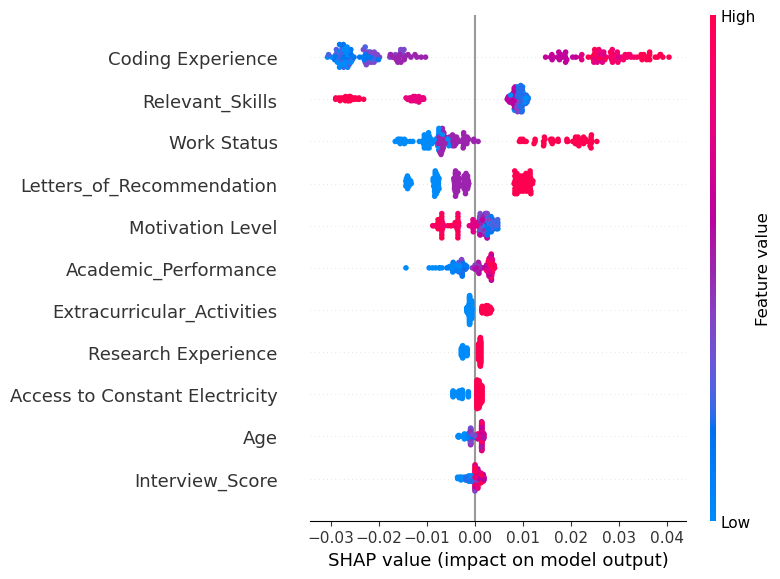

In [61]:
shap.summary_plot(shap_values, x_train, feature_names=['Academic_Performance',
 'Research Experience',
 'Relevant_Skills',
 'Letters_of_Recommendation',
 'Interview_Score',
 'Motivation Level',
 'Extracurricular_Activities',
 'Age',
 'Coding Experience',
 'Work Status',
 'Access to Constant Electricity'] )

The figure above describes the features. Coding experience seem to be the most useful feature while interview score is the least feature. Coding experience has a high feature value and is worth taking note of as the internship success is decided.